# EDA - Données Socioéconomiques

Ce notebook présente une analyse exploratoire des données socioéconomiques (`donnees_socioeconomiques.csv`).
L'objectif est d'analyser la démographie, l'économie et les indicateurs sociaux des communes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuration du style des graphiques
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Chargement du dataset
df_socio = pd.read_csv('../../data_raw/donnees_socioeconomiques.csv')

# Affichage des premières lignes
df_socio.head()

,region,prefecture,commune,population,superficie_km2,densite,taux_urbanisation,taux_alphabétisation,age_median,nombre_menages,revenu_moyen_fcfa
0,Maritime,Vo,Vogan,48777,478,102,0.33,0.76,19,8590,78348
1,Maritime,Vo,Hahotoé,13939,444,31,0.35,0.66,21,3973,112380
2,Maritime,Vo,Anyronkopé,23395,355,65,0.18,0.72,21,4534,107120
3,Maritime,Vo,Momé,19379,302,64,0.10,0.81,22,4207,99265
4,Maritime,Vo,Dagbati,14846,309,48,0.32,0.79,22,3170,133012


In [3]:
# Aperçu des données
print(df_socio.info())
display(df_socio.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   region                115 non-null    object 
 1   prefecture            115 non-null    object 
 2   commune               115 non-null    object 
 3   population            115 non-null    int64  
 4   superficie_km2        115 non-null    int64  
 5   densite               115 non-null    int64  
 6   taux_urbanisation     115 non-null    float64
 7   taux_alphabétisation  115 non-null    float64
 8   age_median            115 non-null    int64  
 9   nombre_menages        115 non-null    int64  
 10  revenu_moyen_fcfa     115 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 10.0+ KB
None


,population,superficie_km2,densite,taux_urbanisation,taux_alphabétisation,age_median,nombre_menages,revenu_moyen_fcfa
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,50971.286957,266.008696,290.573913,0.325565,0.654696,21.539130,10259.460870,133782.713043
std,49819.726192,136.525012,311.039487,0.199654,0.091050,2.074435,9588.455479,55010.105232
min,8843.000000,50.000000,19.000000,0.100000,0.470000,18.000000,1616.000000,69126.000000
25%,26074.000000,149.000000,80.500000,0.190000,0.590000,20.000000,5362.500000,98436.500000
50%,42202.000000,267.000000,140.000000,0.290000,0.640000,22.000000,8417.000000,121278.000000
75%,54761.500000,384.500000,404.000000,0.365000,0.730000,23.000000,11394.500000,146409.000000
max,424644.000000,499.000000,1759.000000,0.950000,0.860000,25.000000,71055.000000,372987.000000


## Vérification de la qualité des données

In [4]:
# Vérification des valeurs manquantes
missing_values = df_socio.isnull().sum()
print("Valeurs manquantes :\n", missing_values[missing_values > 0])

# Vérification des doublons
duplicates = df_socio.duplicated().sum()
print(f"\nNombre de doublons : {duplicates}")

Valeurs manquantes :
 Series([], dtype: int64)

Nombre de doublons : 0


## Analyse Univariée

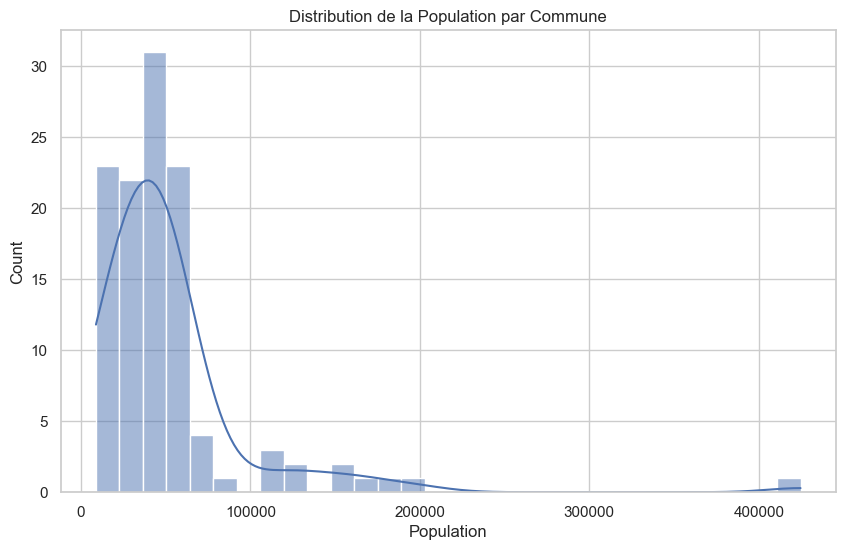

In [5]:
# Distribution de la population
plt.figure(figsize=(10, 6))
sns.histplot(df_socio['population'], kde=True, bins=30)
plt.title('Distribution de la Population par Commune')
plt.xlabel('Population')
plt.show()

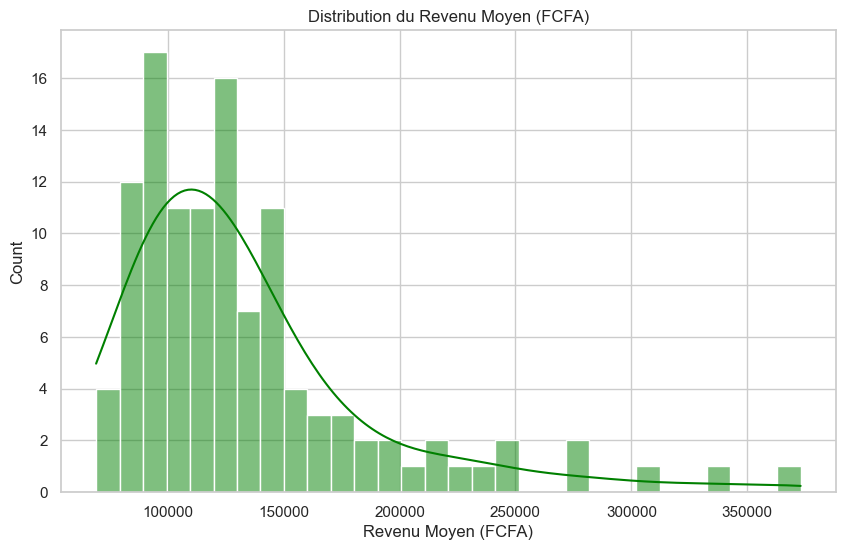

In [6]:
# Distribution du revenu moyen
plt.figure(figsize=(10, 6))
sns.histplot(df_socio['revenu_moyen_fcfa'], kde=True, bins=30, color='green')
plt.title('Distribution du Revenu Moyen (FCFA)')
plt.xlabel('Revenu Moyen (FCFA)')
plt.show()

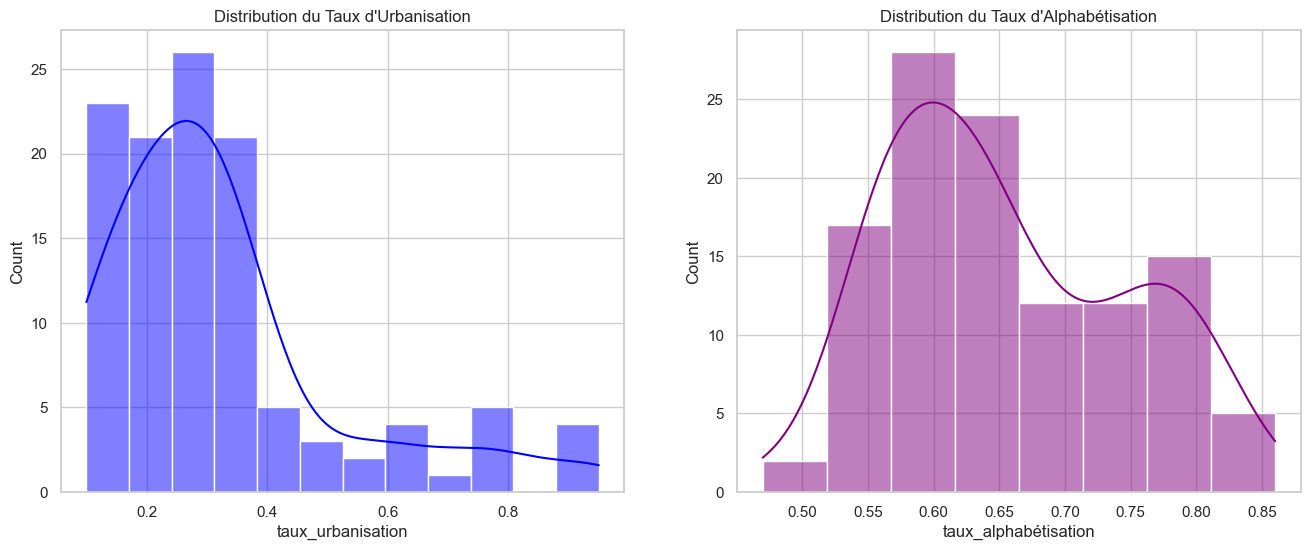

In [7]:
# Taux d'urbanisation vs Taux d'alphabétisation (Distributions)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(df_socio['taux_urbanisation'], kde=True, ax=axes[0], color='blue')
axes[0].set_title("Distribution du Taux d'Urbanisation")

sns.histplot(df_socio['taux_alphabétisation'], kde=True, ax=axes[1], color='purple')
axes[1].set_title("Distribution du Taux d'Alphabétisation")

plt.show()

## Analyse Bivariée

C:\Users\RIG\AppData\Local\Temp\ipykernel_1592\2630113834.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_socio, x='region', y='revenu_moyen_fcfa', palette='Set2')


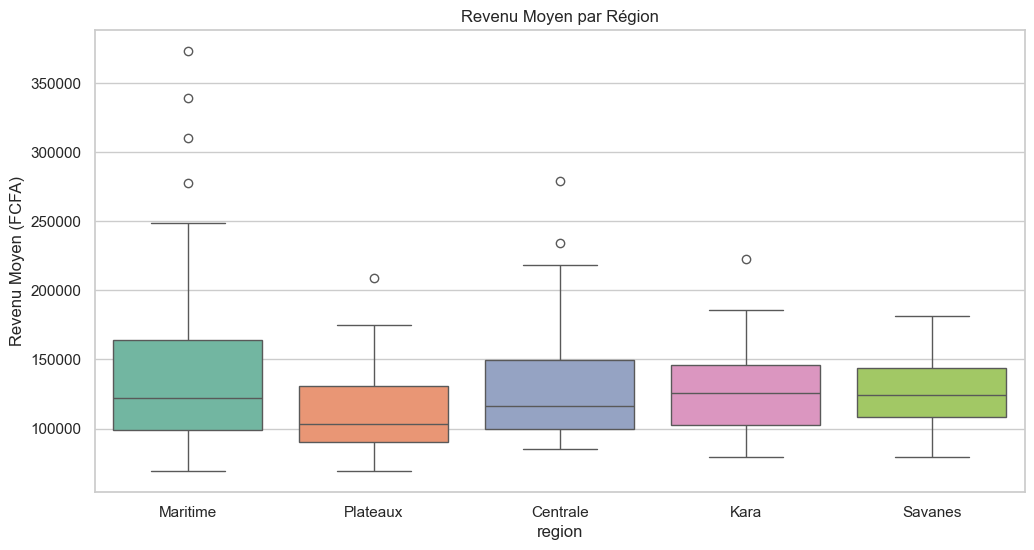

In [8]:
# Revenu Moyen par Région
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_socio, x='region', y='revenu_moyen_fcfa', palette='Set2')
plt.title('Revenu Moyen par Région')
plt.ylabel('Revenu Moyen (FCFA)')
plt.show()

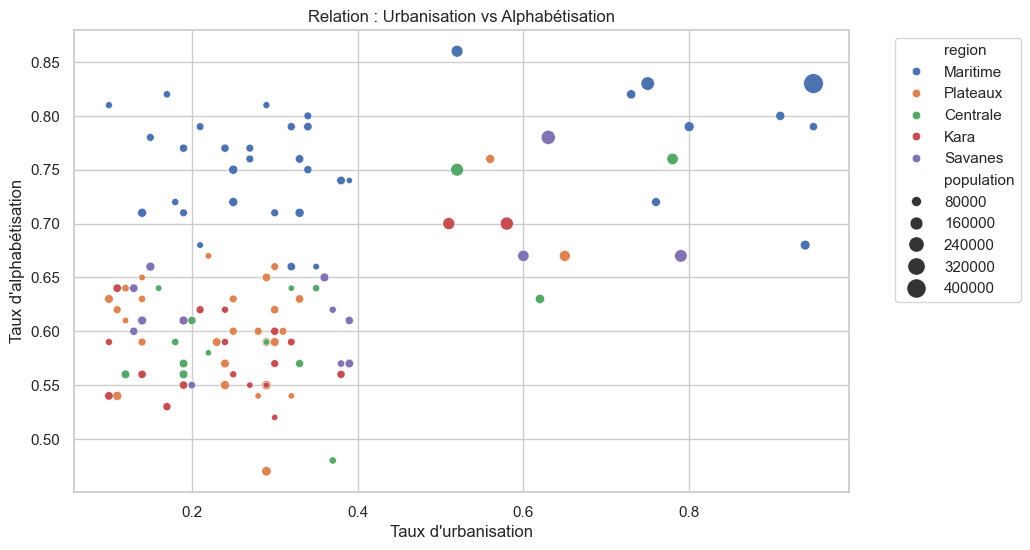

In [9]:
# Relation entre Urbanisation et Alphabétisation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_socio, x='taux_urbanisation', y='taux_alphabétisation', hue='region', size='population', sizes=(20, 200))
plt.title("Relation : Urbanisation vs Alphabétisation")
plt.xlabel("Taux d'urbanisation")
plt.ylabel("Taux d'alphabétisation")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

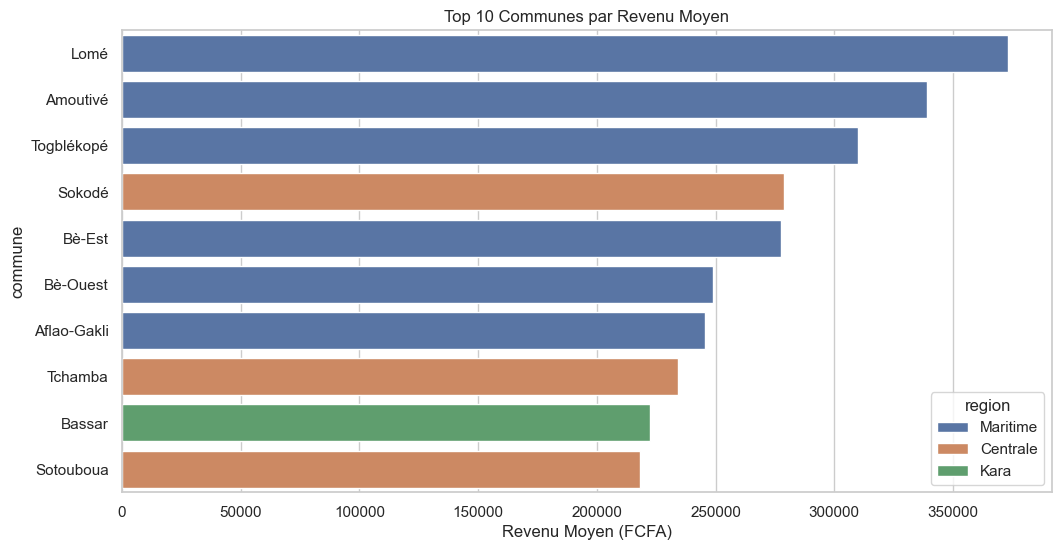

In [ ]:
# Top 10 des communes les plus riches (Revenu Moyen)
top_revenu = df_socio.nlargest(10, 'revenu_moyen_fcfa')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_revenu, x='revenu_moyen_fcfa', y='commune', hue='region', dodge=False)
plt.title('Top 10 Communes par Revenu Moyen')
plt.xlabel('Revenu Moyen (FCFA)')
plt.show()

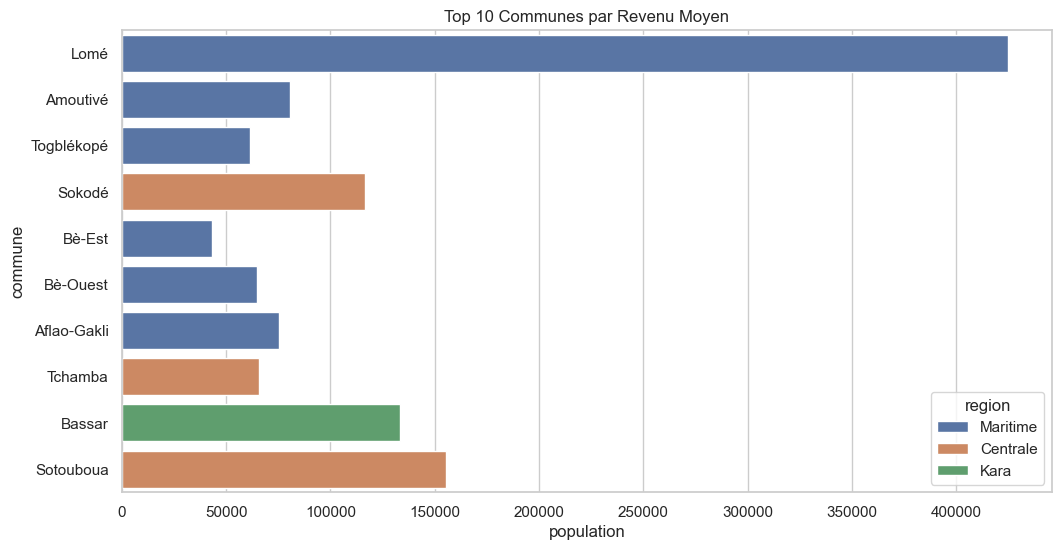

In [11]:
#top 10 des 10 communes les plus peuplées
population    = df_socio.nlargest(10, 'population')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_revenu, x='population', y='commune', hue='region', dodge=False)
plt.title('Top 10 Communes par Revenu Moyen')
plt.xlabel('population')
plt.show()



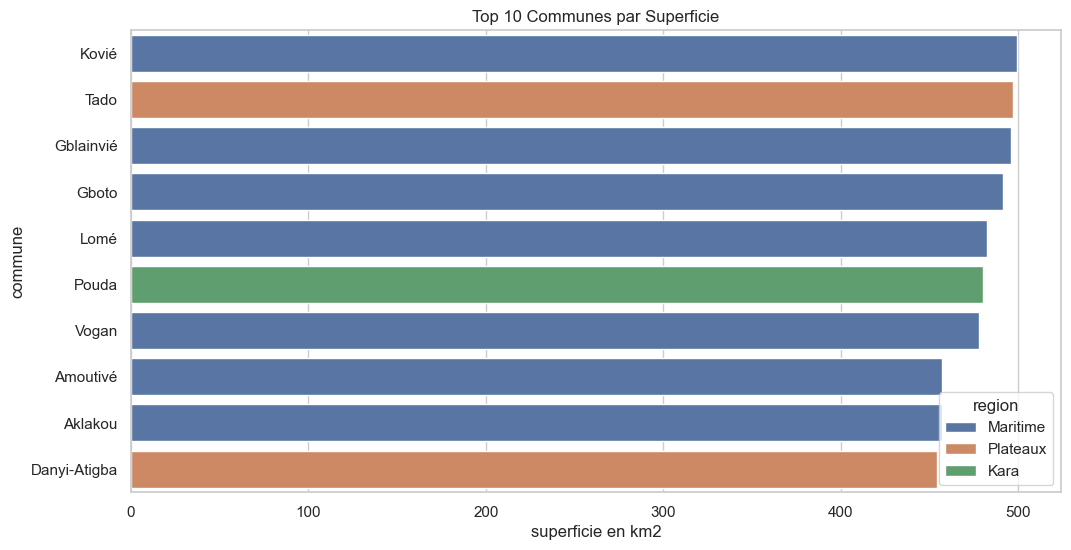

In [ ]:
#top 10 des communes les plus grandes en superficie
superficie    = df_socio.nlargest(10, 'superficie_km2')
plt.figure(figsize=(12, 6))
sns.barplot(data=superficie, x='superficie_km2', y='commune', hue='region', dodge=False)
plt.title('Top 10 Communes par Superficie')
plt.xlabel('superficie en km2')
plt.show()

#communes les moins peu



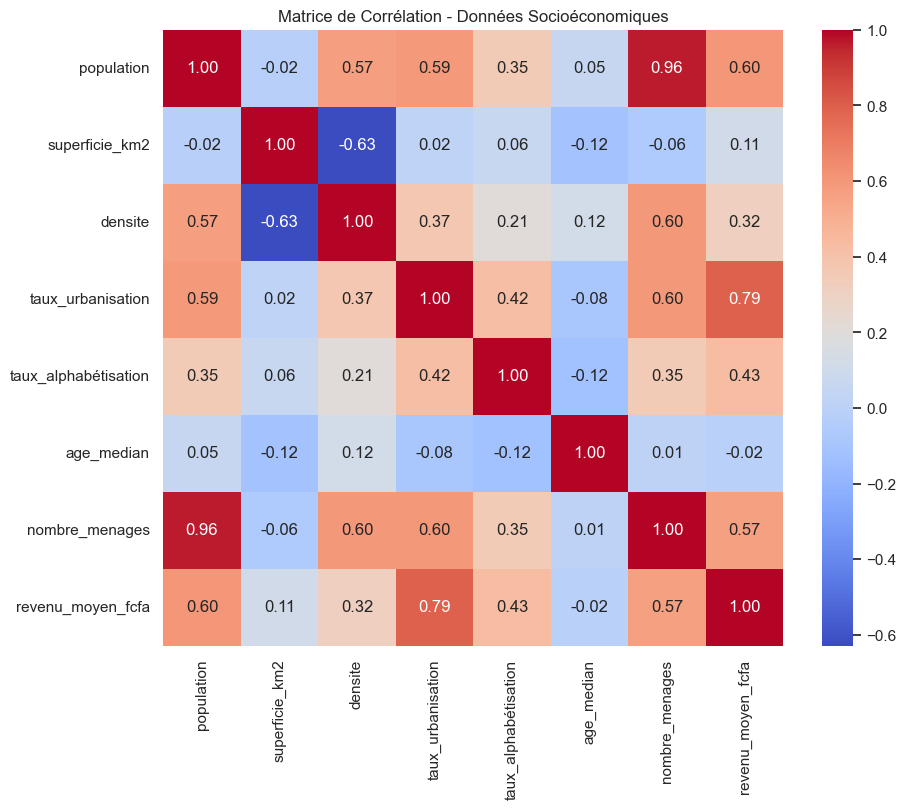

In [14]:
# Matrice de corrélation
numeric_cols = df_socio.select_dtypes(include=[np.number]).columns
corr_matrix = df_socio[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation - Données Socioéconomiques')
plt.show()

In [15]:
#cette donnée est deja propre donc on va la sauvegarder
import os 
import sys  
# 1. Ajout du chemin au système
module_path = r"D:\public_services_optimization_togo\02_Nettoyage_et_Preparation_des_Donnees"
if module_path not in sys.path:
    sys.path.append(module_path)
df_socio.to_csv(r"D:\public_services_optimization_togo\02_Nettoyage_et_Preparation_des_Donnees\data_cleaned\donnees_socioeconomiques_cleaned.csv", index=False)